In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Planning:

- Working with Big 5 personality test data from Kaggle.
- Want to do a clustering project to see if I can find groupings of personality 'types' based on responses.
- Would like to see if I can create a mechanism that will allow someone to answer the questionaire and see what the model would predict their personality to be.

# Acquire:

In [2]:
#Importing Data From CSV (this file uses '\t' as the delimeter, so I need to account for that):
df = pd.read_csv('big_5_data.csv', sep = '\t')

In [3]:
df.head(5)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


# Prepare:

In [4]:
#Creating list to drop columns that contain time to click answers, as well as screen size and latitude/longitude guesses:
drop_columns = ['EXT1_E', 'EXT2_E', 'EXT3_E', 'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E', 'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E', 'EST8_E', 'EST9_E', 'EST10_E', 'AGR1_E', 'AGR2_E', 'AGR3_E', 'AGR4_E', 'AGR5_E', 'AGR6_E', 'AGR7_E', 'AGR8_E', 'AGR9_E', 'AGR10_E', 'CSN1_E', 'CSN2_E', 'CSN3_E', 'CSN4_E', 'CSN5_E', 'CSN6_E', 'CSN7_E', 'CSN8_E', 'CSN9_E', 'CSN10_E', 'OPN1_E', 'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E', 'OPN6_E', 'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E', 'screenw', 'screenh', 'lat_appx_lots_of_err', 'long_appx_lots_of_err', 'dateload', 'introelapse', 'testelapse', 'endelapse']

#Should I leave the elapsed time columns in, and just create a separate dataframe set for modeling?

In [5]:
#Dropping Unneeded Columns:
df = df.drop(columns=drop_columns)

In [6]:
#Converting all '0.0' values to null:
df = df.replace(0.0, np.nan)

In [7]:
#Determining the number of null values in the data:
df.isnull().sum()

EXT1        5503
EXT2        7882
EXT3        7858
EXT4        8676
EXT5       11564
EXT6        7966
EXT7        9962
EXT8        8155
EXT9        8628
EXT10       8044
EST1        9582
EST2       11362
EST3        7291
EST4       12439
EST5        7884
EST6       12630
EST7        8083
EST8        9171
EST9        8153
EST10       8938
AGR1        6740
AGR2       11064
AGR3        6799
AGR4        9419
AGR5        8306
AGR6       12142
AGR7        8082
AGR8       10309
AGR9        7841
AGR10      10186
CSN1       13980
CSN2        8219
CSN3        7842
CSN4        8606
CSN5        9617
CSN6        8435
CSN7        9077
CSN8        9924
CSN9        9286
CSN10      10480
OPN1       10984
OPN2        7725
OPN3        9371
OPN4        8444
OPN5        9465
OPN6        9911
OPN7       10251
OPN8        9809
OPN9        9475
OPN10       7960
IPC            0
country       77
dtype: int64

In [8]:
#It appears that there are, at most, 13,000 '0.0' or nulls in the data. 
#I'm going to go ahead and drop the rows containing null values:
df = df.dropna()

In [9]:
reverse_scored = ["EXT2","EXT4","EXT6","EXT8","EXT10","EST2","EST4","AGR1","AGR3","AGR5","AGR7","CSN2","CSN4","CSN6","CSN8","OPN2","OPN4","OPN6"]

In [10]:
df.EXT2.unique()

array([1., 5., 3., 2., 4.])

In [11]:
def reverseScoring(df, high, cols):
    '''Reverse scores on given columns
     df = your data frame,
     high = highest score available
     cols = the columns you want reversed in list form'''
    df[cols] = (high + 1) - df[cols]
    return df

In [12]:
reverseScoring(df, 5, reverse_scored)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,IPC,country
0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,...,4.0,5.0,4.0,5.0,5.0,3.0,4.0,5.0,1,GB
1,3.0,1.0,3.0,2.0,3.0,3.0,2.0,1.0,1.0,1.0,...,4.0,4.0,3.0,5.0,4.0,2.0,5.0,3.0,1,MY
2,2.0,3.0,4.0,2.0,3.0,4.0,1.0,3.0,2.0,1.0,...,2.0,5.0,4.0,4.0,5.0,3.0,4.0,4.0,1,GB
3,2.0,4.0,2.0,3.0,4.0,4.0,2.0,2.0,1.0,2.0,...,5.0,4.0,3.0,5.0,4.0,4.0,3.0,3.0,1,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,1.0,3.0,2.0,...,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,2,KE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,4.0,3.0,4.0,4.0,4.0,2.0,2.0,4.0,2,US
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,3.0,3.0,...,5.0,5.0,5.0,5.0,3.0,4.0,5.0,4.0,1,US
1015338,4.0,4.0,4.0,3.0,5.0,5.0,4.0,4.0,4.0,2.0,...,5.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,6,US
1015339,2.0,2.0,3.0,2.0,2.0,4.0,1.0,2.0,2.0,2.0,...,4.0,4.0,3.0,4.0,4.0,5.0,5.0,3.0,1,US


In [13]:
# Dropping rows that come from non-unique IP addresses for the sake of cleanliness:
df = df.drop(df[df.IPC > 1].index)

In [14]:
#Dropping 'IPC' column after dropping non-unique IP rows:
df = df.drop(columns = 'IPC')

## Preparation Considerations:
- There are many cells that have 0.0 in their values. I will need to get rid of these, just like I got rid of the null values.
- It does not appear that it was considered, so I need to go through and fix the values in question that are reverse-scored.
- Do I need to keep the following:
    - introelapse The time in seconds spent on the landing / intro page
    - testelapse  The time in seconds spent on the page with the survey questions
    - endelapse   The time in seconds spent on the finalization page (where the user was asked to indicate if they has answered
    * The only real value of this would be to see if there is a relationship between time lapse and any of the big 5. Maybe higher elapsed times indicates more neuroticism (lower on 'emotional stability')?
    * I could also create a dataset for modeling that has these removed, but leave them in my original set for analysis, if needed.

In [15]:
df.sample(15)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
524250,1.0,3.0,2.0,3.0,1.0,4.0,1.0,2.0,3.0,1.0,...,5.0,5.0,5.0,5.0,5.0,3.0,4.0,4.0,5.0,US
634747,4.0,2.0,4.0,4.0,3.0,4.0,1.0,4.0,4.0,2.0,...,4.0,5.0,5.0,4.0,4.0,5.0,4.0,4.0,4.0,PE
961755,4.0,4.0,3.0,4.0,4.0,5.0,3.0,3.0,3.0,1.0,...,5.0,3.0,5.0,4.0,3.0,4.0,4.0,5.0,3.0,SE
291379,2.0,2.0,3.0,4.0,2.0,4.0,4.0,1.0,5.0,1.0,...,4.0,5.0,5.0,3.0,3.0,5.0,3.0,3.0,3.0,MX
1008267,1.0,1.0,5.0,2.0,4.0,4.0,3.0,2.0,2.0,1.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,US
82390,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,3.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,GB
150670,2.0,3.0,2.0,2.0,4.0,5.0,3.0,3.0,2.0,2.0,...,5.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,GB
229402,2.0,2.0,2.0,4.0,4.0,4.0,2.0,4.0,5.0,3.0,...,1.0,3.0,2.0,4.0,3.0,4.0,1.0,4.0,3.0,NO
12413,2.0,4.0,4.0,2.0,4.0,5.0,2.0,2.0,3.0,1.0,...,4.0,5.0,4.0,5.0,5.0,5.0,3.0,4.0,5.0,US
592217,1.0,2.0,4.0,1.0,3.0,4.0,1.0,2.0,1.0,2.0,...,3.0,5.0,3.0,4.0,4.0,3.0,1.0,5.0,4.0,US


In [ ]:
# Splitting the data (this is the code from the curriculum - return to customize later):

# split test off, 20% of original df size. 
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123)

# split validate off, 30% of what remains (24% of original df size)
# thus train will be 56% of original df size. 
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123)

print("train observations: ", train.shape[0])
print("validate observations: ", validate.shape[0])
print("test observations: ", test.shape[0])

In [ ]:
#Creating groups of questions based on metric they evaluate:

extroversion = {"EXT1" : "I am the life of the party.",
"EXT2" : "I don't talk a lot.",
"EXT3" : "I feel comfortable around people.",
"EXT4" : "I keep in the background.",
"EXT5" : "I start conversations.",
"EXT6" : "I have little to say.",
"EXT7" : "I talk to a lot of different people at parties.",
"EXT8" : "I don't like to draw attention to myself.",
"EXT9" : "I don't mind being the center of attention.",
"EXT10" : "I am quiet around strangers."}

neuroticism = {"EST1" : "I get stressed out easily.",
"EST2" : "I am relaxed most of the time.",
"EST3" : "I worry about things.",
"EST4" : "I seldom feel blue.",
"EST5" : "I am easily disturbed.",
"EST6" : "I get upset easily.",
"EST7" : "I change my mood a lot.",
"EST8" : "I have frequent mood swings.",
"EST9" : "I get irritated easily.",
"EST10" : "I often feel blue."}

agreeableness = {"AGR1" : "I feel little concern for others.",
"AGR2" : "I am interested in people.",
"AGR3" : "I insult people.",
"AGR4" : "I sympathize with others' feelings.",
"AGR5" : "I am not interested in other people's problems.",
"AGR6" : "I have a soft heart.",
"AGR7" : "I am not really interested in others.",
"AGR8" : "I take time out for others.",
"AGR9" : "I feel others' emotions.",
"AGR10" : "I make people feel at ease."}

conscientiousness = {"CSN1" : "I am always prepared.",
"CSN2" : "I leave my belongings around.",
"CSN3" : "I pay attention to details.",
"CSN4" : "I make a mess of things.",
"CSN5" : "I get chores done right away.",
"CSN6" : "I often forget to put things back in their proper place.",
"CSN7" : "I like order.",
"CSN8" : "I shirk my duties.",
"CSN9" : "I follow a schedule.",
"CSN10" : "I am exacting in my work."}

openness = {"OPN1" : "I have a rich vocabulary.",
"OPN2" : "I have difficulty understanding abstract ideas.",
"OPN3" : "I have a vivid imagination.",
"OPN4" : "I am not interested in abstract ideas.",
"OPN5" : "I have excellent ideas.",
"OPN6" : "I do not have a good imagination.",
"OPN7" : "I am quick to understand things.",
"OPN8" : "I use difficult words.",
"OPN9" : "I spend time reflecting on things.",
"OPN10" : "I am full of ideas."}

# Exploration:

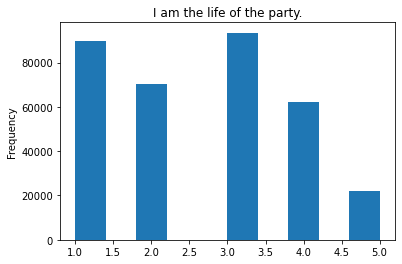

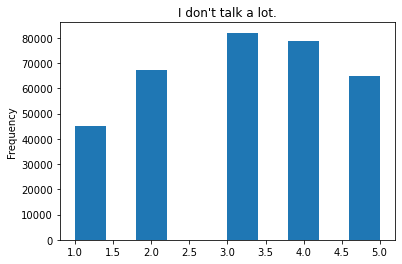

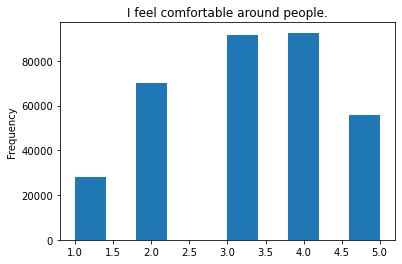

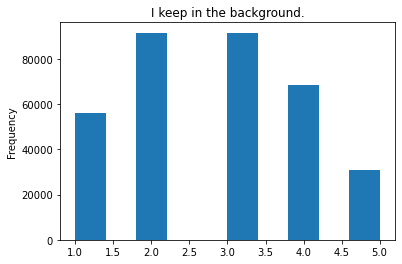

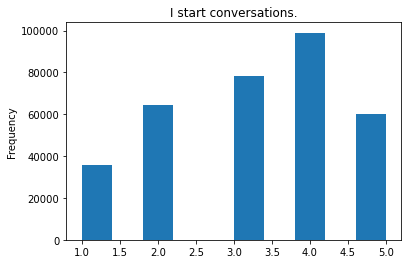

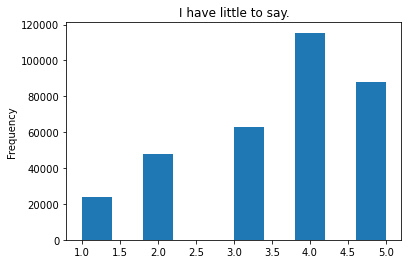

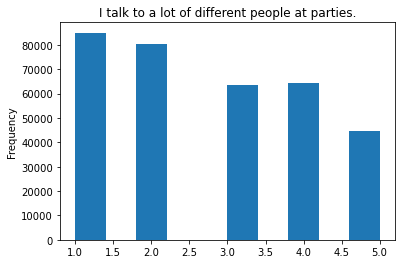

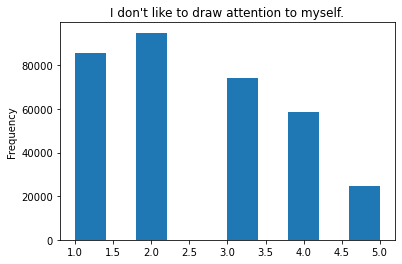

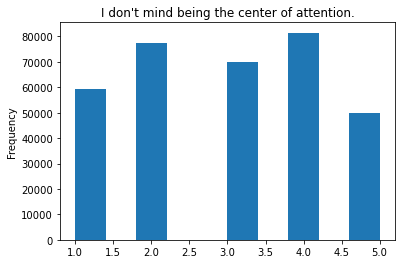

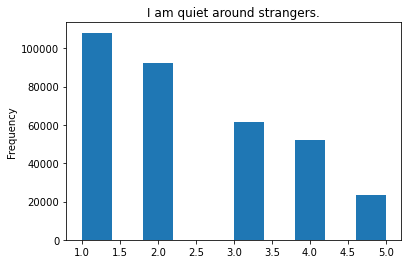

<Figure size 432x288 with 0 Axes>

In [48]:
#Graphing distributions for responses on quesitons related to extroversion:
for i in list(extroversion.keys()):
    train[i].plot.hist().set_title(extroversion[i])
    plt.figure();

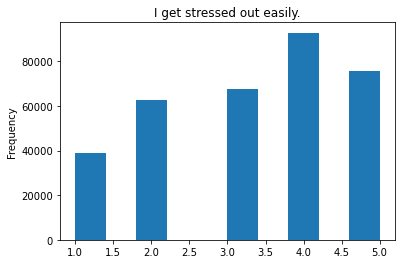

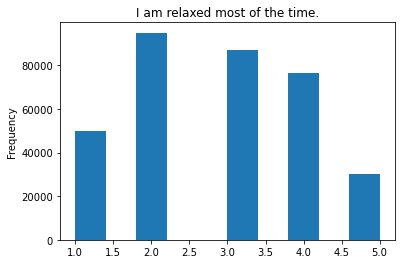

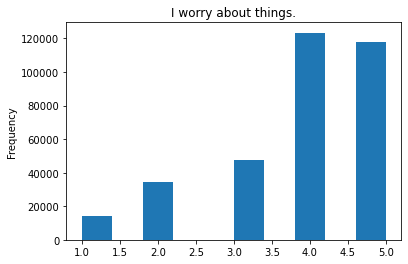

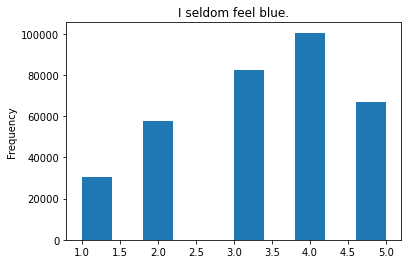

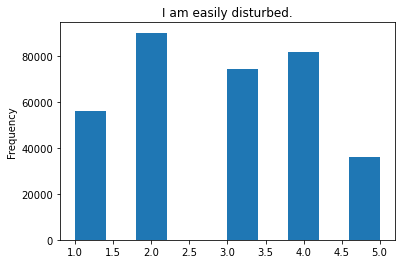

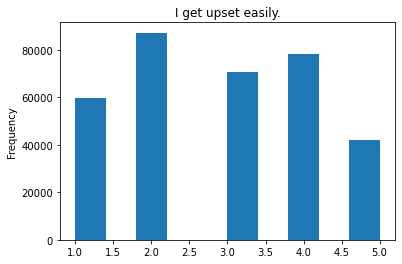

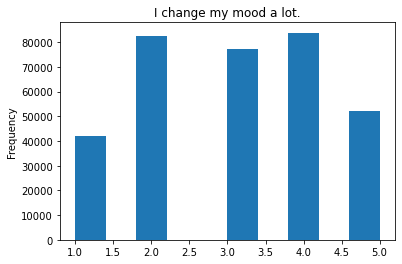

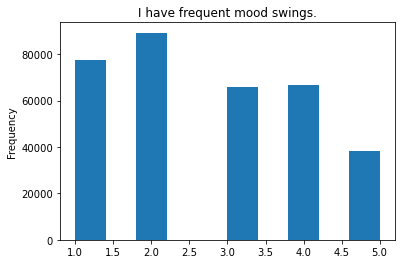

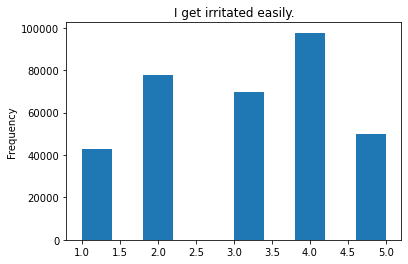

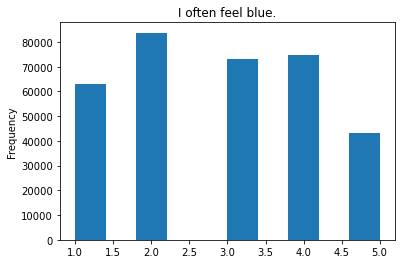

<Figure size 432x288 with 0 Axes>

In [49]:
#Graphing distributions for responses on quesitons related to neuroticism:
for i in list(neuroticism.keys()):
    train[i].plot.hist().set_title(neuroticism[i])
    plt.figure();

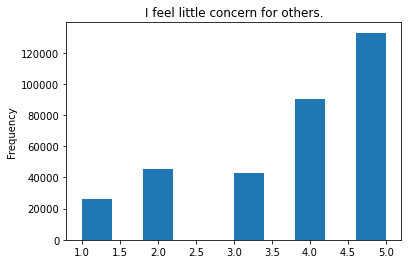

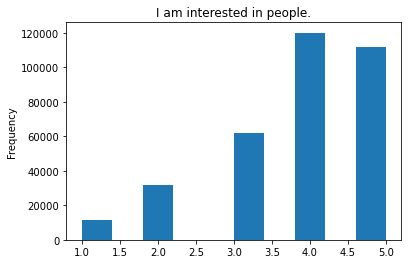

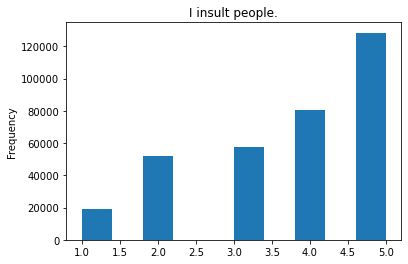

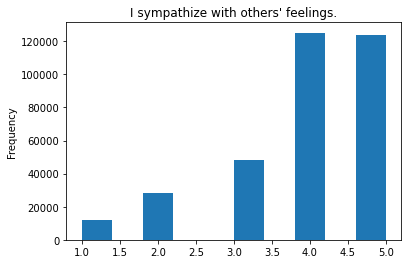

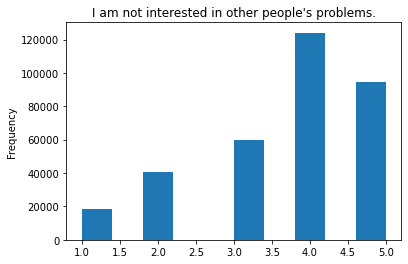

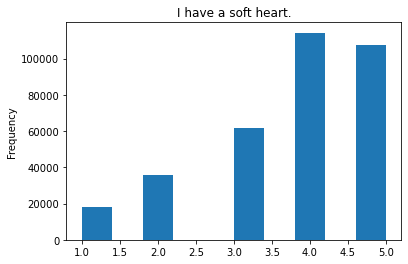

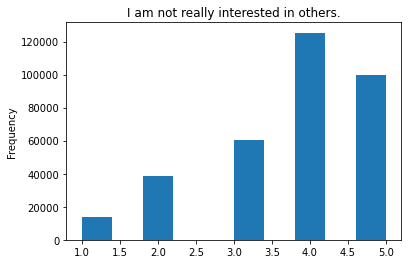

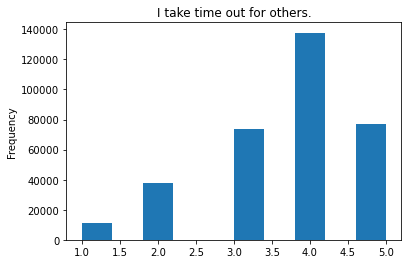

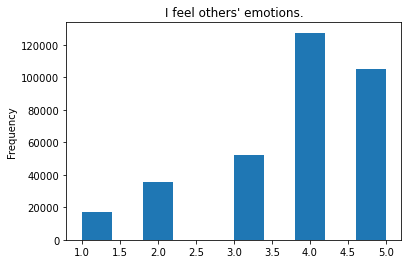

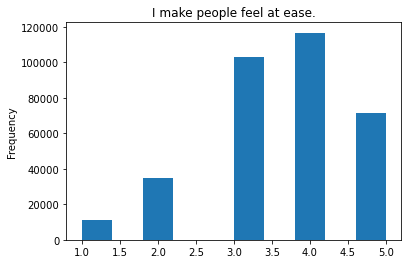

<Figure size 432x288 with 0 Axes>

In [50]:
#Graphing distributions for responses on quesitons related to agreeableness:
for i in list(agreeableness.keys()):
    train[i].plot.hist().set_title(agreeableness[i])
    plt.figure();

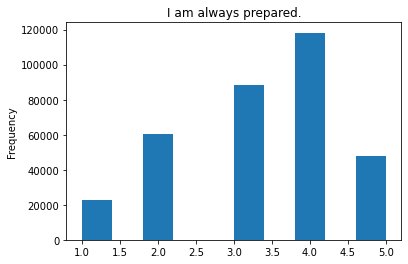

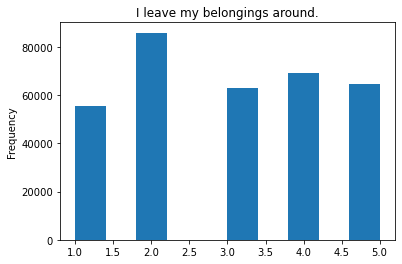

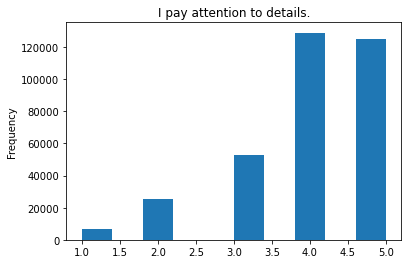

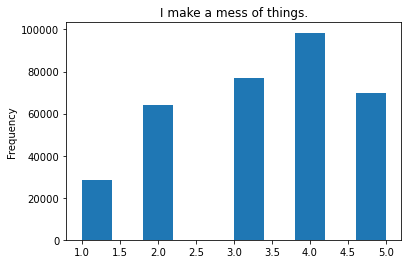

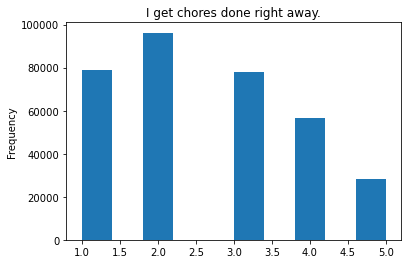

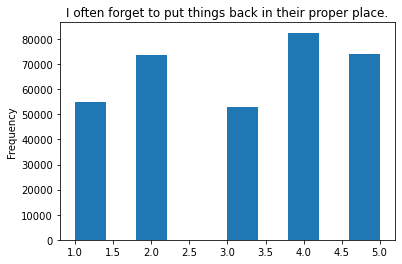

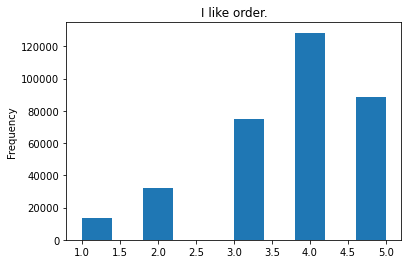

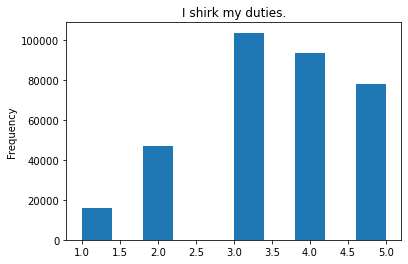

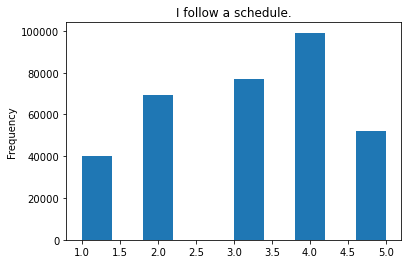

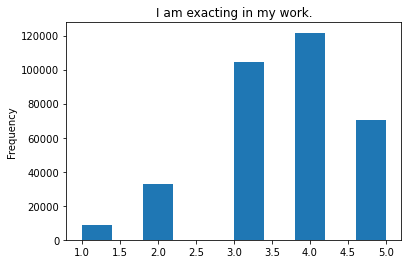

<Figure size 432x288 with 0 Axes>

In [51]:
#Graphing distributions for responses on quesitons related to conscientiousness:
for i in list(conscientiousness.keys()):
    train[i].plot.hist().set_title(conscientiousness[i])
    plt.figure();

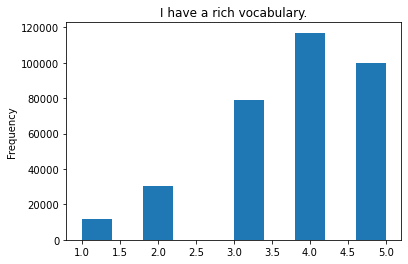

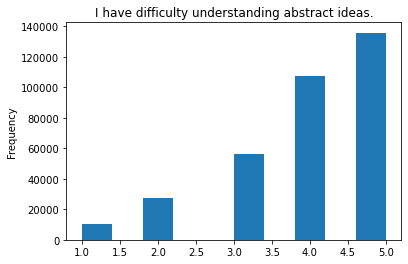

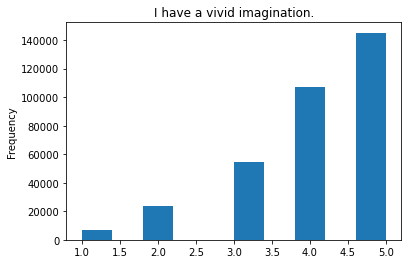

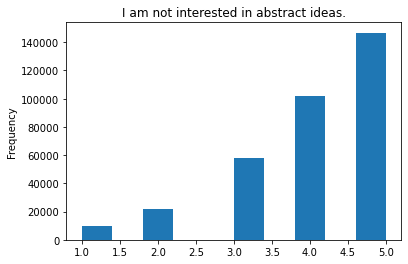

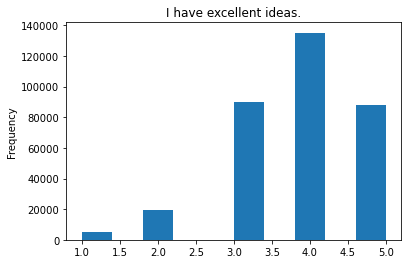

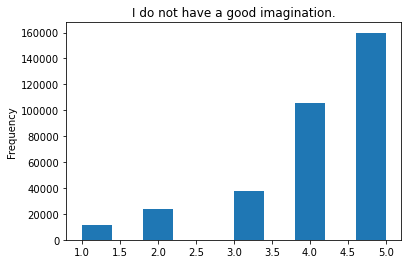

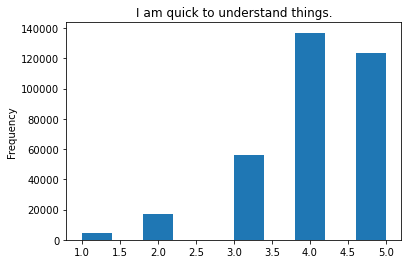

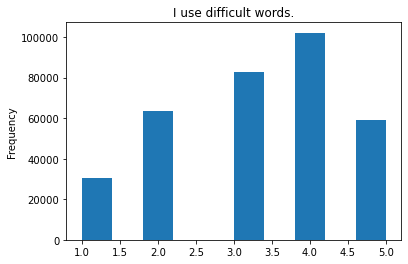

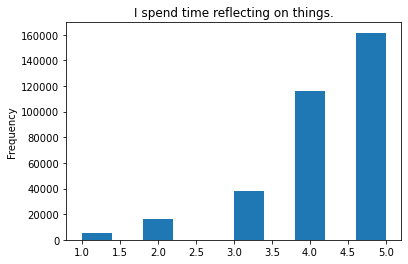

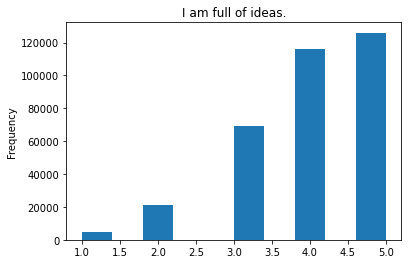

<Figure size 432x288 with 0 Axes>

In [52]:
#Graphing distributions for responses on quesitons related to openness:
for i in list(openness.keys()):
    train[i].plot.hist().set_title(openness[i])
    plt.figure();

In [102]:
#Graphing Mean Score of Each Category:

mean_extroversion = 0
for i in extroversion.keys():
    mean_extroversion += train[i].mean()
    
mean_neuroticism = 0
for i in neuroticism.keys():
    mean_neuroticism += train[i].mean()
    
mean_agreeableness = 0
for i in agreeableness.keys():
    mean_agreeableness += train[i].mean()
    
mean_conscientiousness = 0
for i in conscientiousness.keys():
    mean_conscientiousness += train[i].mean()
    
mean_openness = 0
for i in openness.keys():
    mean_openness += train[i].mean()

In [108]:
metric_names = ['extroversion', 'neuroticism', 'agreeableness', 'conscientiousness', 'openness']
metric_means = [mean_extroversion, mean_neuroticism, mean_agreeableness, mean_conscientiousness, mean_openness]

In [115]:
metric_means_df['metric_names'] = pd.DataFrame(metric_names)

In [116]:
metric_means_df['means'] = metric_means

array([[<AxesSubplot:title={'center':'means'}>]], dtype=object)

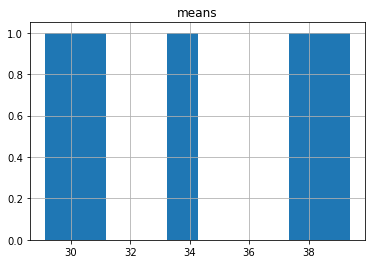

In [120]:
metric_means_df.hist()

TypeError: missing a required argument: 'height'

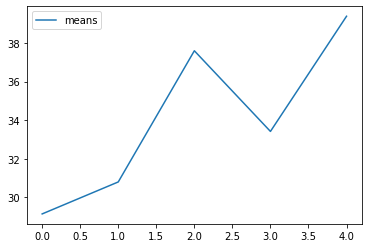

In [119]:
metric_means_df.plot().bar(data = metric_means_df, x = metric_means_df['metric_names'], y = metric_means_df['means'])